Name: Sean Meade

ID: 10128921

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Set stylesheet for plots
plt.style.use('classic') 

# Expand default number of rows printed for Pandas
pd.options.display.max_rows = 600

This section summarizes the data to skip and go to task click [here](#load-data-set)

## Data description and Information

Before starting I have renamed the following attributes to allow easier analysis and clarity:

1. **`default → credit_in_default`**

2. **`balance → avg_yearly_balance`**

3. **`housing → housing_loan`**

4. **`loan → personal_loan`**

5. **`contact → contact_type`**

6. **`day → last_contact_day_of_month`**

7. **`month → last_contact_month_of_year`**

8. **`duration → last_contact_duration`**

9. **`campaign → number_of_campaign_contacts`**

10. **`pdays → days_since_prev_campaign_contact`**

11. **`previous → previous_campaign_contacts`**

12. **`poutcome → prev_campaign_outcome`**


Bank Marketing Data Description can be found [here](https://archive.ics.uci.edu/dataset/222/bank+marketing):

Slightly audited description of the dataset for better clarity, including the name changes mentioned above:

#### bank client data:

1. **age**: Age of client (numeric)
2. **job**: Type of job (categorical: "admin.", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services")
3. **marital**: Marital status (categorical: "married", "divorced", "single"; note: "divorced" means divorced or widowed)
4. **education**: Level of education (categorical: "secondary", "primary", "tertiary")
5. **credit_in_default**: Has credit in default (the borrower has failed to meet the agreed-upon repayment terms of a loan or credit agreement)? (binary: "yes", "no")
6. **avg_yearly_balance**: Average yearly balance, in euros (numeric - can be negative)
7. **housing_loan**: Has housing loan? (binary: "yes", "no")
8. **personal_loan**: Has personal loan? (binary: "yes", "no")

#### Related with the last contact of the current campaign:

9. **contact_type**: Contact communication type (categorical: "telephone", "cellular")
10. **last_contact_day_of_month**: Last contact day of the month (numeric)
11. **last_contact_month_of_year**: Last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12. **last_contact_duration**: Last contact duration, in seconds (numeric)

#### Other attributes:

13. **number_of_campaign_contacts**: Number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. **days_since_prev_campaign_contact**: Number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. **previous_campaign_contacts**: Number of contacts performed before this campaign and for this client (numeric)
16. **prev_campaign_outcome**: Outcome of the previous marketing campaign (categorical: "other", "failure", "success")

#### Output variable (desired target):

17. **subscribed**: Has the client subscribed a term deposit? (binary: "yes", "no")

## Load data set

In [3]:
# Load dataset
df = pd.read_csv('./bank.csv', header=0)

# Dictionary mapping old column names to new ones
rename_dict = {
    "default": "credit_in_default",
    "balance": "avg_yearly_balance",
    "housing": "housing_loan",
    "loan": "personal_loan",
    "contact": "contact_type",
    "day": "last_contact_day_of_month",
    "month": "last_contact_month_of_year",
    "duration": "last_contact_duration",
    "campaign": "number_of_campaign_contacts",
    "pdays": "days_since_prev_campaign_contact",
    "previous": "previous_campaign_contacts",
    "poutcome": "prev_campaign_outcome"
}

# Rename columns
df.rename(columns=rename_dict, inplace=True)

# Create dataframe containing just numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Create dataframe containing just categorical columns
df_categorical = df.select_dtypes(include=['object'])

# Task 1: Exploratory Data Analysis (EDA)

##### _1.1 Formulate a particular question that might be interesting to answer by exploring the bank dataset_

<center><i><strong>Question: </strong>What factors influence whether a person subscribes to a term deposit, and what profile characteristics differentiate subscribers from non-subscribers?_</i></center>

##### _1.2.1 Calculate statistics for the numerical and categorical attributes_

### Quick look at the first and last 5 rows of the dataframe:

In [4]:
# Look at the head and tail together
df

,age,job,marital,education,credit_in_default,avg_yearly_balance,housing_loan,personal_loan,contact_type,last_contact_day_of_month,last_contact_month_of_year,last_contact_duration,number_of_campaign_contacts,days_since_prev_campaign_contact,previous_campaign_contacts,prev_campaign_outcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes


In [5]:
#descriptive statistics summary
df['subscribed'].value_counts()

subscribed
no     1000
yes    1000
Name: count, dtype: int64

In [6]:
# Print statistical summary for all numerical attributes
numeric_describe = df_numeric.describe()
numeric_describe.loc['skew'] = df_numeric.skew()
numeric_describe

,age,avg_yearly_balance,last_contact_day_of_month,last_contact_duration,number_of_campaign_contacts,days_since_prev_campaign_contact,previous_campaign_contacts
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000
skew,0.853921,11.461564,0.403661,2.045787,2.320856,0.920006,5.461168


In [7]:
df_categorical.describe()

,job,marital,education,credit_in_default,housing_loan,personal_loan,contact_type,last_contact_month_of_year,prev_campaign_outcome,subscribed
count,1990,2000,1896,2000,2000,2000,1809,2000,1546,2000
unique,11,3,3,2,2,2,2,12,3,2
top,management,married,secondary,no,no,no,cellular,feb,failure,no
freq,461,1111,995,1985,1037,1750,1663,404,955,1000


In [8]:
df.isna().sum()

age                                  12
job                                  10
marital                               0
education                           104
credit_in_default                     0
avg_yearly_balance                    0
housing_loan                          0
personal_loan                         0
contact_type                        191
last_contact_day_of_month             0
last_contact_month_of_year            0
last_contact_duration                 0
number_of_campaign_contacts           0
days_since_prev_campaign_contact      0
previous_campaign_contacts            0
prev_campaign_outcome               454
subscribed                            0
dtype: int64

In [9]:
df['prev_campaign_outcome'].value_counts()

prev_campaign_outcome
failure    955
success    444
other      147
Name: count, dtype: int64

In [10]:
df['credit_in_default'].value_counts()

credit_in_default
no     1985
yes      15
Name: count, dtype: int64

In [11]:
yes_subscribed = df['subscribed'] == "yes"
yes_default = df['credit_in_default'] == "yes"

subscribed_yes_default = df.loc[yes_subscribed & yes_default].shape[0]
subscribed_no_default = df.loc[yes_subscribed & ~yes_default].shape[0]

print("Number of subscribers:")
print(f"with credit in default: {subscribed_yes_default}/{df.loc[yes_subscribed].shape[0]}")
print(f"with no credit in default: {subscribed_no_default}/{df.loc[yes_subscribed].shape[0]}")
print()

no_subscribed = df['subscribed'] == "no"

not_subscribed_yes_default = df.loc[no_subscribed & yes_default].shape[0]
not_subscribed_no_default = df.loc[no_subscribed & ~yes_default].shape[0]

print("Number of non-subscribers:")
print(f"with credit in default: {not_subscribed_yes_default}/{df.loc[no_subscribed].shape[0]}")
print(f"with no credit in default: {not_subscribed_no_default}/{df.loc[no_subscribed].shape[0]}")

Number of subscribers:
with credit in default: 1/1000
with no credit in default: 999/1000

Number of non-subscribers:
with credit in default: 14/1000
with no credit in default: 986/1000


##### _1.2.2 Draw a short conclusion on statistics gathered_

Missing values:

| Column                           | Missing Values | Percentage Missing |
|----------------------------------|----------------|--------------------|
| prev_campaign_outcome            | 454            | 22.70%             |
| contact_type                     | 191            | 9.55%              |
| education                        | 104            | 5.20%              |
| age                              | 12             | 0.60%              |
| job                              | 10             | 0.50%              |

_Note: From the [Data Description](https://archive.ics.uci.edu/dataset/222/bank+marketing) we know that the NaN values of prev_campaign_outcome are of category 'unknown'._

The dataset contains highly skewed variables, including `avg_yearly_balance`, `previous_campaign_contacts`, and `number_of_campaign_contacts`, meaning the mean is pulled toward the tail.

Binary categorical variables include `credit_in_default`, `housing_loan`, `personal_loan`, and `subscribed`.

Less than 1% (15) of customers have credit in default. Over half (995 out of 1896) of individuals have a secondary education. Among 11 job categories, "management" accounts for nearly a quarter (461), and over half (1,111) of clients are married. The average yearly balance is €1,413.66, with a high standard deviation (3131.22), indicating financial variability.

February was the most common last contact month at 404. Most customers (1750) do not have a personal loan, and about half (1037) don't have a housing loan.

The subscribed variable is artificially balanced (1,000 "yes" and 1,000 "no"), implying possible dataset curation.

##### _1.3.1 Use at least two different plotting techniques to plot the distribution of some numerical attributes_

| Variable              | Type        | Segment   | Expectation |
| --------------------- | ----------- | --------- | ----------- |
| job                   | categorical | client    | High        |
| education             | categorical | client    | High        |
| avg_yearly_balance    | numerical   | financial | High        |
| prev_campaign_outcome | categorical | campaign  | High        |


In [12]:
df_plot = df.copy()


#### 1. **age** :


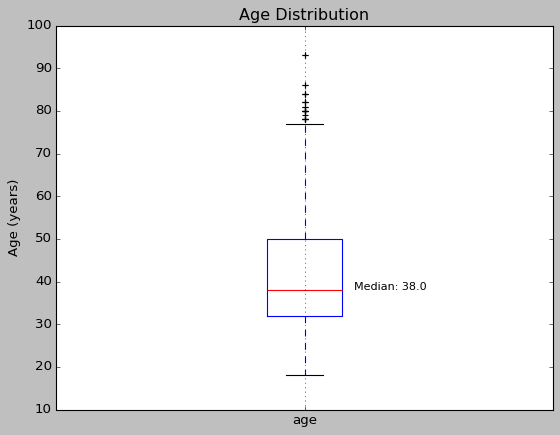

In [13]:
df_plot.boxplot(column='age')
# Add title and labels
plt.title('Age Distribution')
plt.ylabel('Age (years)', fontsize=12)

# Add grid for better readability
plt.grid(axis='y')

# Detailed annotations
age_data = df_plot['age']
plt.annotate(f'Median: {age_data.median():.1f}', 
             xy=(1, age_data.median()), 
             xytext=(1.1, age_data.median()),
             fontsize=10)
plt.show()

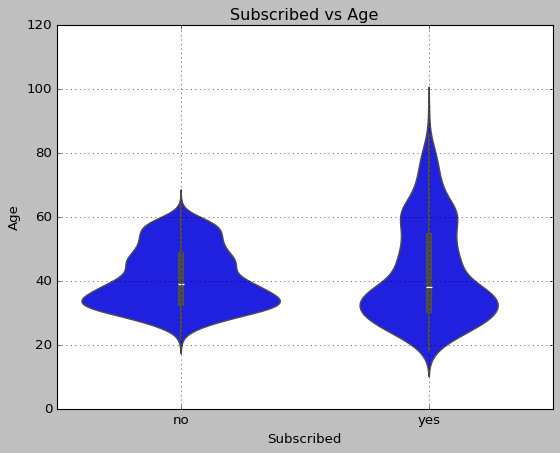

In [14]:
# Using seaborn to create a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_plot, x='subscribed', y='age')
plt.title('Subscribed vs Age')
plt.xlabel('Subscribed')
plt.ylabel('Age')
plt.grid(True)
plt.show()

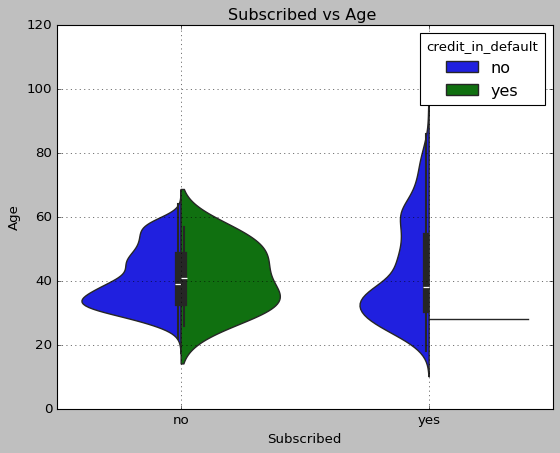

In [15]:
# Using seaborn to create a scatter plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_plot, x='subscribed', y='age', hue='credit_in_default', split=True)
plt.title('Subscribed vs Age ')
plt.xlabel('Subscribed')
plt.ylabel('Age')
plt.grid(True)
plt.show()

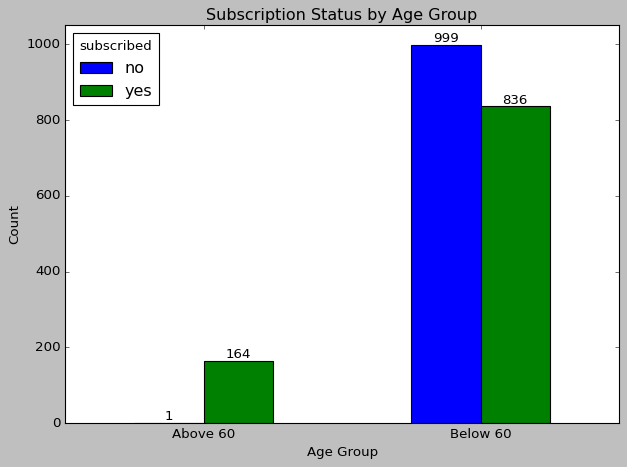

In [16]:
# Create age groups
df_plot['age_group'] = np.where(df_plot['age'] > 60, 'Above 60', 'Below 60')

# Group by age group and subscription status, then count
grouped = df_plot.groupby(['age_group', 'subscribed']).size().unstack()

# Plot
ax = grouped.plot(kind='bar')
plt.title('Subscription Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.ylim((0, 1050))
plt.xticks(rotation=0)

# Add numbers above each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.tight_layout()
plt.show()

2. **job** :

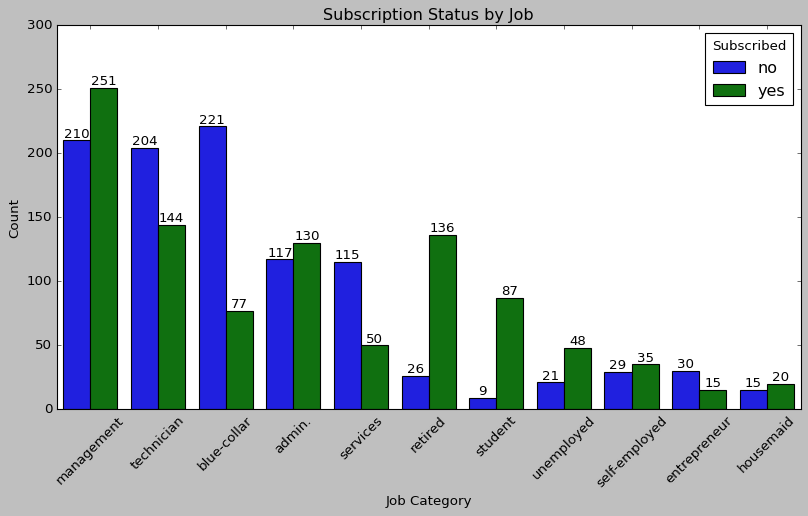

In [17]:
plt.figure(figsize=(12, 6))

# Assign the countplot to ax
ax = sns.countplot(data=df_plot, x='job', hue='subscribed', order=df_plot['job'].value_counts().index)

# Add bar labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d')  # Format as integer

# Formatting
plt.xticks(rotation=45)  # Rotate labels for readability
plt.xlabel("Job Category")
plt.ylabel("Count")
plt.title("Subscription Status by Job")
plt.legend(title="Subscribed")
plt.show()

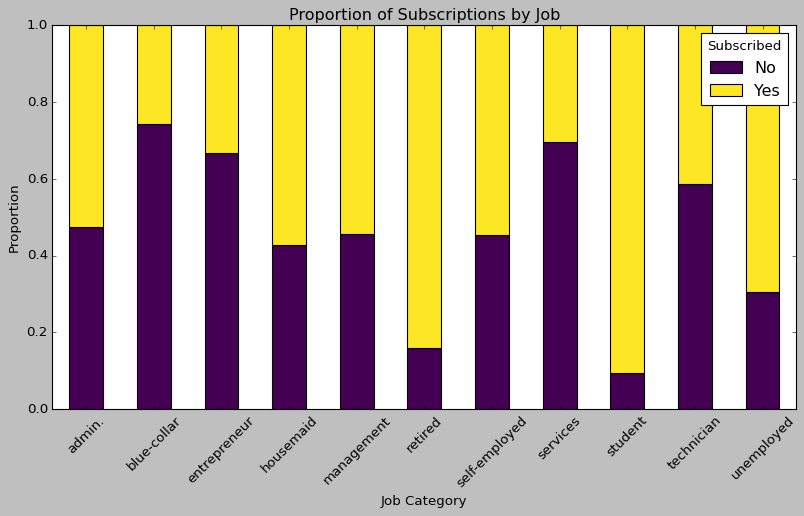

In [18]:
# Normalize counts to get proportions
job_subscribed = df_plot.groupby(['job', 'subscribed']).size().unstack()
job_subscribed = job_subscribed.div(job_subscribed.sum(axis=1), axis=0)

# Plot
job_subscribed.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="viridis")
plt.xticks(rotation=45)
plt.xlabel("Job Category")
plt.ylabel("Proportion")
plt.title("Proportion of Subscriptions by Job")
plt.legend(title="Subscribed", labels=["No", "Yes"])
plt.show()


3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)


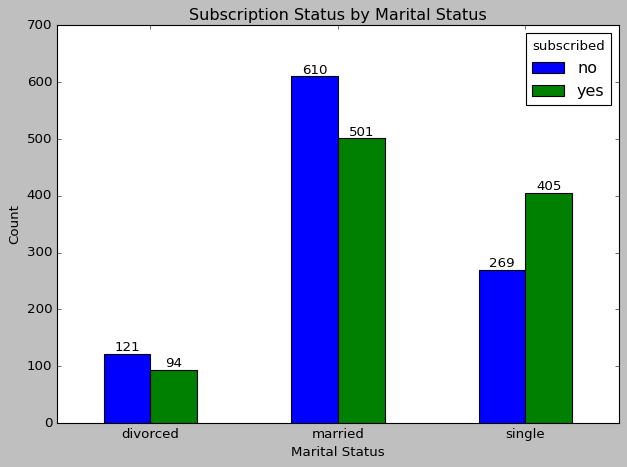

In [19]:
# Group by marital group and subscription status, then count
grouped = df_plot.groupby(['marital', 'subscribed']).size().unstack()

# Plot
ax = grouped.plot(kind='bar')
plt.title('Subscription Status by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add numbers above each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.tight_layout()
plt.show()

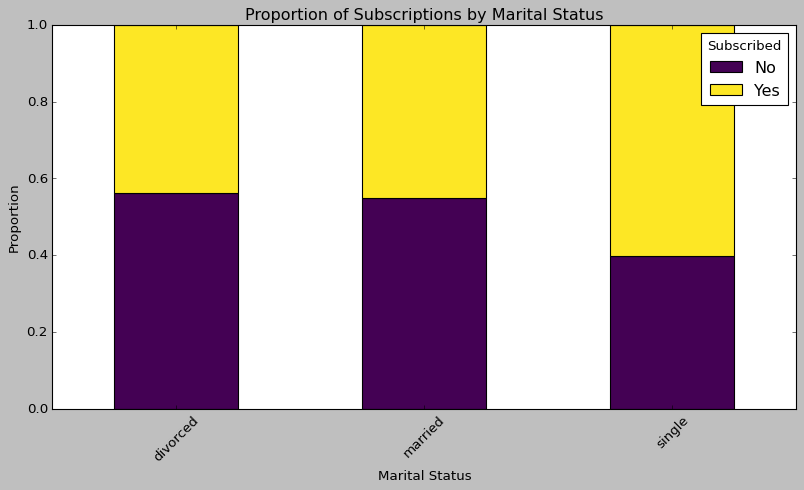

In [20]:
# Normalize counts to get proportions
marital_subscribed = df_plot.groupby(['marital', 'subscribed']).size().unstack()
marital_subscribed = marital_subscribed.div(marital_subscribed.sum(axis=1), axis=0)

# Plot
marital_subscribed.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="viridis")
plt.xticks(rotation=45)
plt.xlabel("Marital Status")
plt.ylabel("Proportion")
plt.title("Proportion of Subscriptions by Marital Status")
plt.legend(title="Subscribed", labels=["No", "Yes"])
plt.show()

4. education: level of education (categorical:"secondary","primary","tertiary")


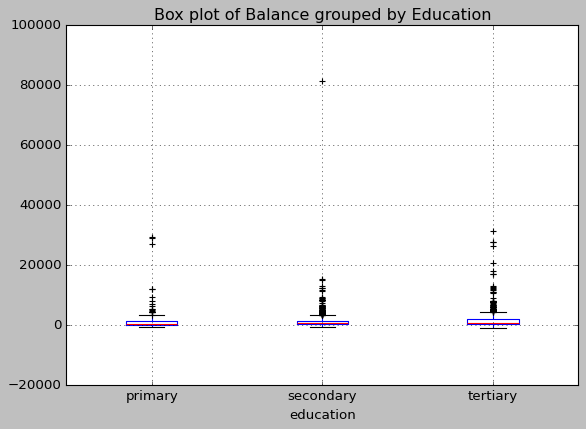

In [21]:
# Boxplots of ApplicantIncome, grouped by the categorical attribute Education
df_plot.boxplot(column='avg_yearly_balance', by='education')
plt.title('Box plot of Balance grouped by Education')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()

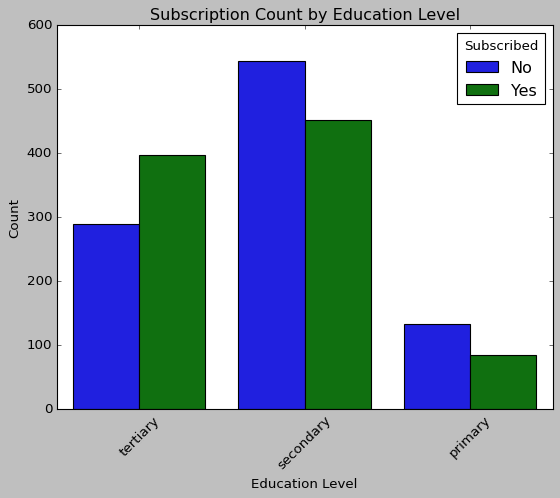

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df_plot['education'], hue=df_plot['subscribed'])

plt.title("Subscription Count by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.legend(title="Subscribed", labels=["No", "Yes"])

plt.xticks(rotation=45)
plt.show()

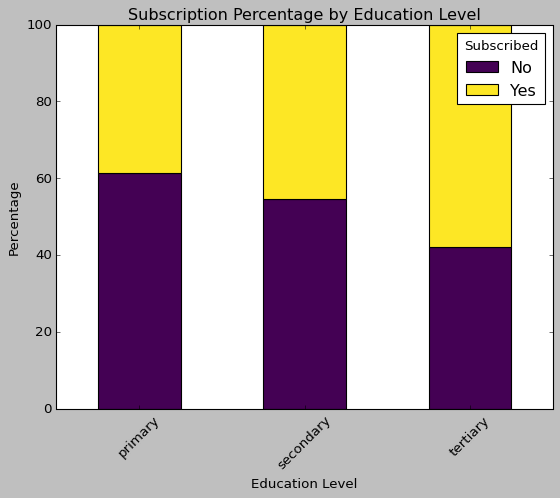

In [23]:
# Get percentage counts
education_subscribed = df_plot.groupby(['education', 'subscribed']).size().unstack()
education_subscribed = education_subscribed.div(education_subscribed.sum(axis=1), axis=0) * 100  # Convert to %

# Plot
education_subscribed.plot(kind='bar', stacked=True, figsize=(8, 6), colormap="viridis")

plt.title("Subscription Percentage by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Percentage")
plt.legend(title="Subscribed", labels=["No", "Yes"])
plt.xticks(rotation=45)

plt.show()

5. credit_in_default: has credit in default (the borrower has failed to meet the agreed-upon repayment terms of a loan or credit agreement)? (binary: "yes","no")

Given the low percentage of clients with credit in default I decided to skip credit_in_default.

6. avg_yearly_balance: average yearly balance, in euros (numeric - can be negative)

Number of balances below zero in avg_yearly_balance: 93


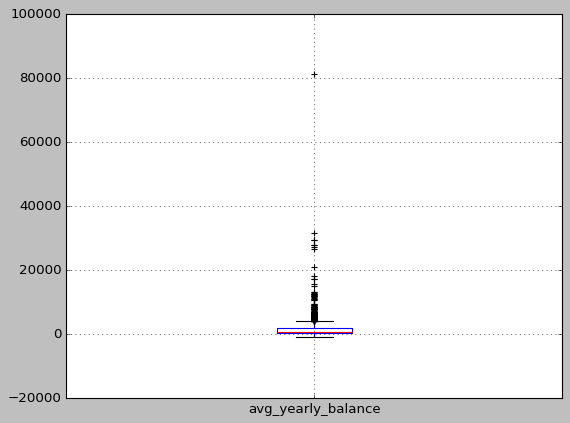

In [24]:
below_zero_count = (df_plot['avg_yearly_balance'] < 0).sum()
print(f"Number of balances below zero in avg_yearly_balance: {below_zero_count}")

df_plot.boxplot(column='avg_yearly_balance')
plt.show()

I decided to seperate the balances into positive and negative to better see the negative due to outliers.

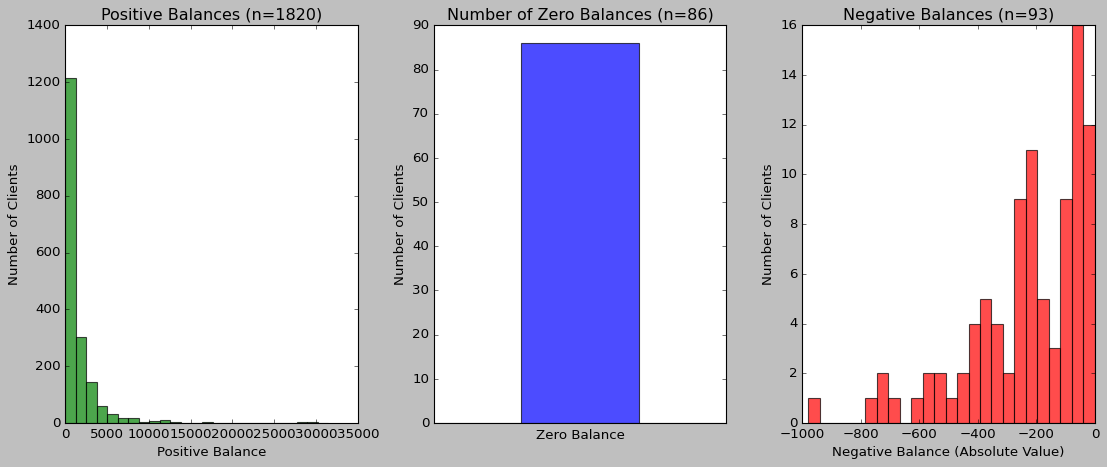

In [25]:
# Create a figure with two subplots side by side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))

# Set the number of bins you want
num_bins = 25

# Get positive and negative balances
positive_balances = df_plot.loc[(df_plot['avg_yearly_balance'] > 0) & (df_plot['avg_yearly_balance'] != 81204), 'avg_yearly_balance']
zero_balances = df_plot.loc[df_plot['avg_yearly_balance'] == 0, 'avg_yearly_balance']
negative_balances = df_plot.loc[df_plot['avg_yearly_balance'] < 0, 'avg_yearly_balance']

# Create histograms
ax1.hist(positive_balances, bins=num_bins, color='green', alpha=0.7)
ax2.hist(zero_balances, bins=num_bins, color='blue', alpha=0.7)
ax3.hist(negative_balances, bins=num_bins, color='red', alpha=0.7)

# Add labels and titles
ax1.set_xlabel('Positive Balance')
ax1.set_ylabel('Number of Clients')
ax1.set_title(f'Positive Balances (n={len(positive_balances)})')

ax2.set_xlabel('Zero Balance')
ax2.set_ylabel('Number of Clients')
ax2.set_title(f'Number of Zero Balances (n={len(zero_balances)})')
ax2.set_xlim([-0.05, 0.05])
ax2.set_xticks([])

ax3.set_xlabel('Negative Balance (Absolute Value)')
ax3.set_ylabel('Number of Clients')
ax3.set_title(f'Negative Balances (n={len(negative_balances)})')

plt.tight_layout()
plt.show()

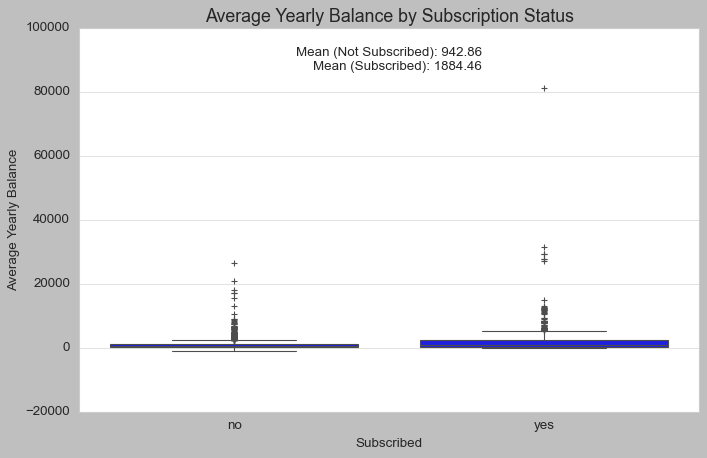

In [26]:
# Set the style for a clean, professional look
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create the boxplot
sns.boxplot(x='subscribed', y='avg_yearly_balance', data=df_plot)

# Customize the plot
plt.title('Average Yearly Balance by Subscription Status', fontsize=16)
plt.xlabel('Subscribed', fontsize=12)
plt.ylabel('Average Yearly Balance', fontsize=12)

# Add statistical summary
plt.text(0.65, 0.95, f'Mean (Not Subscribed): {df_plot[df_plot["subscribed"] == "no"]["avg_yearly_balance"].mean():.2f}\n'
			f'Mean (Subscribed): {df_plot[df_plot["subscribed"] == "yes"]["avg_yearly_balance"].mean():.2f}', 
			transform=plt.gca().transAxes, 
			verticalalignment='top', 
			horizontalalignment='right')
plt.show()

 
7. housing_loan & personal_loan:

I wanted to check if a combination of having a loan and being in default corrilate to subscribing or not but there are not enough data points (11). However I think it is worth noting that only one of these 11 subscribed.

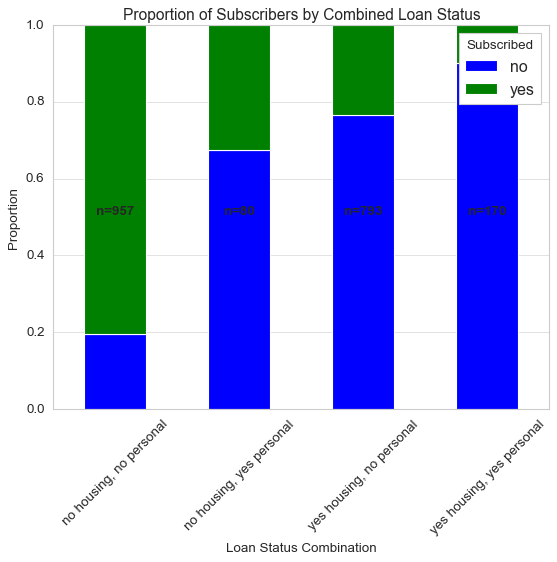

In [27]:
# Create combined loan status subscribed
df_plot['loan_status'] = df_plot['housing_loan'] + ' housing, ' + df_plot['personal_loan'] + ' personal'

# Get total counts for each category
loan_counts = df_plot.groupby(['loan_status', 'subscribed']).size().unstack(fill_value=0)
total_counts = loan_counts.sum(axis=1)

# Calculate counts
loan_counts = df_plot.groupby(['loan_status', 'subscribed']).size().unstack(fill_value=0)
loan_props = loan_counts.div(loan_counts.sum(axis=1), axis=0)

# Plot stacked bars
loan_props.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Proportion of Subscribers by Combined Loan Status', fontsize=14)

# Add the total number of clients for each category
for i, (idx, count) in enumerate(total_counts.items()):
    # Add label with category size at the top of each bar
    plt.text(i, 0.5, f"n={count:,}", ha='center', va='bottom', fontweight='bold')
    
plt.xlabel('Loan Status Combination', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.legend(title='Subscribed')
plt.xticks(rotation=45)

plt.show()

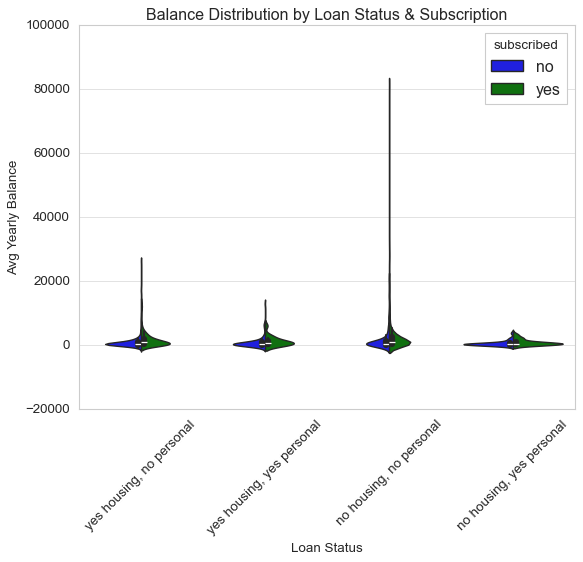

In [28]:
sns.violinplot(x=df_plot['loan_status'], y=df_plot['avg_yearly_balance'], hue=df_plot['subscribed'], split=True)

plt.title("Balance Distribution by Loan Status & Subscription")
plt.xlabel("Loan Status")
plt.ylabel("Avg Yearly Balance")
plt.xticks(rotation=45) 

plt.show()

#### related with the last contact of the current campaign:

9. contact_type: contact communication type (categorical: "telephone","cellular")


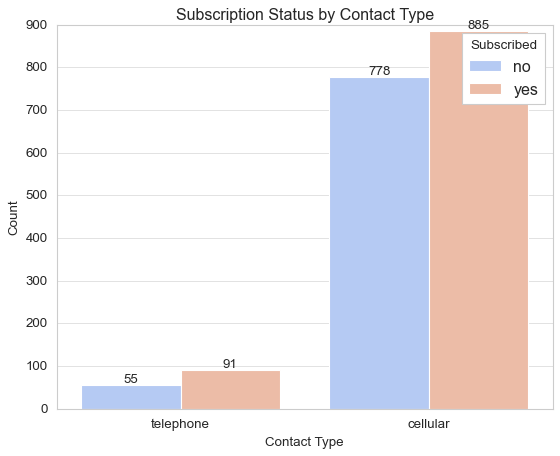

In [29]:
ax = sns.countplot(data=df_plot, x='contact_type', hue='subscribed', order=["telephone", "cellular"], palette="coolwarm")

# Add count labels on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.xlabel("Contact Type")
plt.ylabel("Count")
plt.title("Subscription Status by Contact Type")
plt.legend(title="Subscribed")
plt.show()

<Figure size 960x560 with 0 Axes>

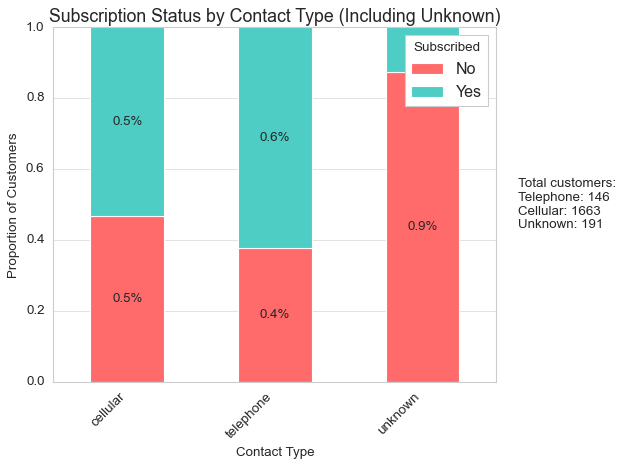

In [30]:
# Fill NaN values with 'unknown' for visualization
df_plot['contact_type'] = df_plot['contact_type'].fillna('unknown')

# Calculate percentage of subscriptions for each contact type
contact_subscription = df_plot.groupby('contact_type')['subscribed'].value_counts(normalize=True).unstack()

# Ensure all subscription statuses are present
if 'yes' not in contact_subscription.columns:
	contact_subscription['yes'] = 0
if 'no' not in contact_subscription.columns:
	contact_subscription['no'] = 0

# Reorder columns to ensure consistent color mapping
contact_subscription = contact_subscription[['no', 'yes']]

# Create the stacked bar plot
plt.figure(figsize=(12, 7))
contact_subscription.plot(kind='bar', stacked=True, 
							color=['#FF6B6B', '#4ECDC4'])

# Customize the plot
plt.title('Subscription Status by Contact Type (Including Unknown)', fontsize=16)
plt.xlabel('Contact Type', fontsize=12)
plt.ylabel('Proportion of Customers', fontsize=12)
plt.legend(title='Subscribed', labels=['No', 'Yes'])
plt.xticks(rotation=45, ha='right')

# Add percentage labels on the bars
for c in plt.gca().containers:
	plt.gca().bar_label(c, fmt='%.1f%%', label_type='center')

# Add a text summary
total_counts = df_plot['contact_type'].value_counts()
summary_text = "\n".join([
	f"Total customers:",
	f"Telephone: {total_counts.get('telephone', 0)}",
	f"Cellular: {total_counts.get('cellular', 0)}",
	f"Unknown: {total_counts.get('unknown', 0)}"
])
plt.text(1.05, 0.5, summary_text, 
			transform=plt.gca().transAxes, 
			verticalalignment='center',
			bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()

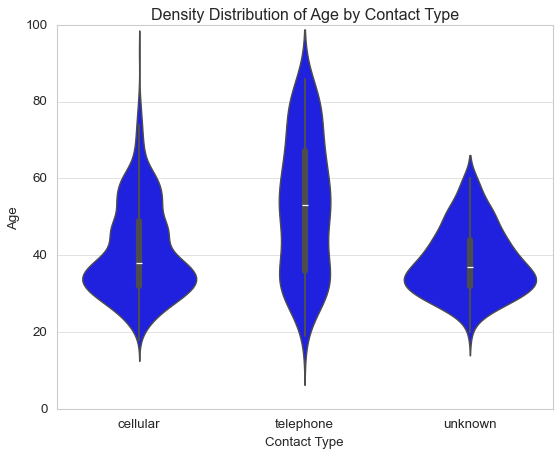

In [31]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_plot, x='contact_type', y='age')

plt.xlabel("Contact Type")
plt.ylabel("Age")
plt.title("Density Distribution of Age by Contact Type")
plt.show()


C:\Users\seanp\AppData\Local\Temp\ipykernel_19004\2629442165.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='contact_type', y='age', data=df_plot,


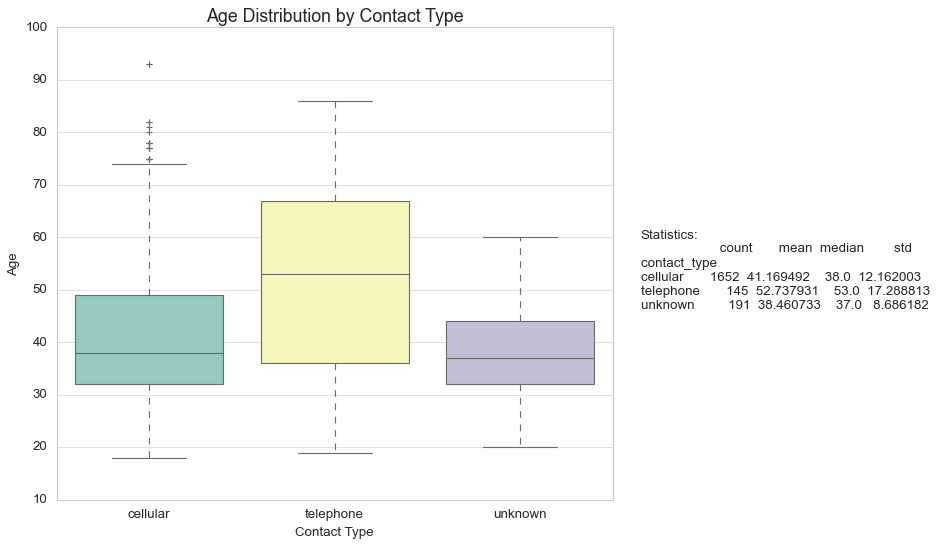

In [32]:
# Fill NaN values with 'unknown' for visualization
df_plot['contact_type'] = df_plot['contact_type'].fillna('unknown')

# Create the figure and plot
plt.figure(figsize=(12, 7))
sns.boxplot(x='contact_type', y='age', data=df_plot, 
			palette='Set3')

# Customize the plot
plt.title('Age Distribution by Contact Type', fontsize=16)
plt.xlabel('Contact Type', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Add statistical summary
summary_stats = df_plot.groupby('contact_type')['age'].agg(['count', 'mean', 'median', 'std'])

summary_text = "\nStatistics:\n" + "       " + summary_stats.to_string()
plt.text(1.05, 0.5, summary_text, 
			transform=plt.gca().transAxes, 
			verticalalignment='center',
			bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()

10. last_contact_day_of_month: last contact day of the month (numeric)


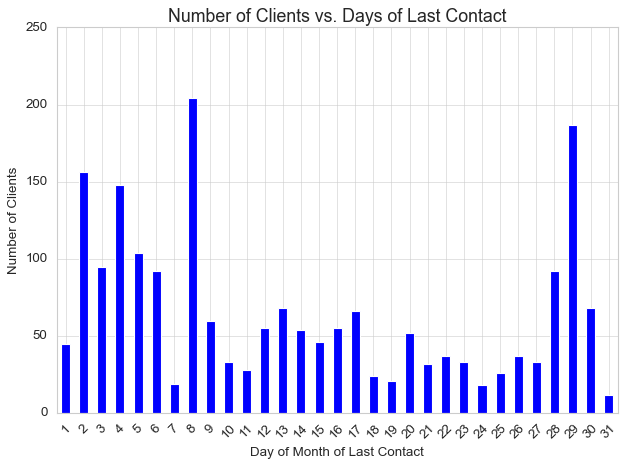

In [33]:
day_frequency_table = df_plot['last_contact_day_of_month'].value_counts().sort_index()

# Plot the bar chart
day_frequency_table.plot(kind='bar')

# Set the title and labels
plt.title('Number of Clients vs. Days of Last Contact', fontsize=16)
plt.xlabel('Day of Month of Last Contact', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)

# Rotate month labels
plt.xticks(rotation=45)
# Adjust the layout to avoid clipping
plt.tight_layout()  
plt.show()

11. last_contact_month_of_year last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")


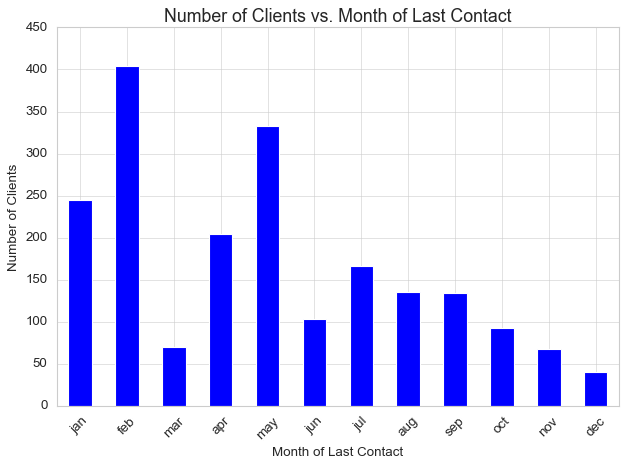

In [34]:
# Define the correct order of the months
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Convert the 'last_contact_month_of_year' to a categorical type with the correct order
df_plot['last_contact_month_of_year'] = pd.Categorical(df_plot['last_contact_month_of_year'], categories=month_order, ordered=True)

# Get the frequency count and sort by the custom month order
month_frequency_table = df_plot['last_contact_month_of_year'].value_counts().sort_index()

# Plot the bar chart
month_frequency_table.plot(kind='bar')

# Set the title and labels
plt.title('Number of Clients vs. Month of Last Contact', fontsize=16)
plt.xlabel('Month of Last Contact', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)

# Rotate month labels if needed
plt.xticks(rotation=45)
# Adjust the layout to avoid clipping
plt.tight_layout()  
plt.show()

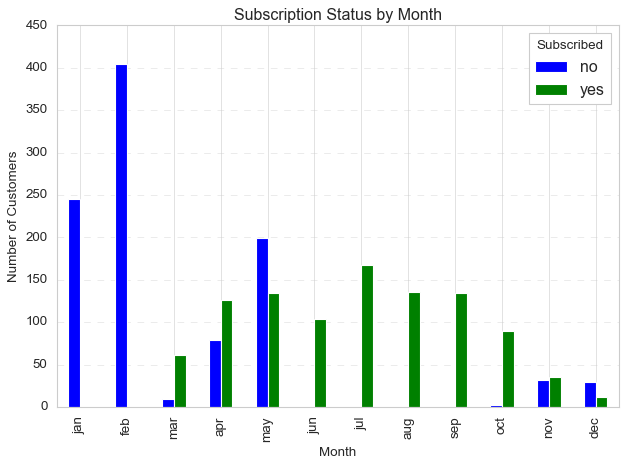

In [35]:
# Count subscriptions by month
subscription_by_month = pd.crosstab(df_plot['last_contact_month_of_year'], df_plot['subscribed'])

# Plot the data
subscription_by_month.plot(kind='bar')

plt.title('Subscription Status by Month')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.legend(title='Subscribed')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

the most common month for last contact was February

12. last_contact_duration: last contact duration, in seconds (numeric)

As mentioned in discussions on the forum and the description of the data last_contact_duration is unuseable for prediction due to duration of a contact being longer for subscription and shorter for failure to subscribe.

#### other attributes:

13. number_of_campaign_contacts: number of contacts performed during this campaign and for this client (numeric, includes last contact)


14. days_since_prev_campaign_contact: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)


In [36]:
print(f'{int((df_plot['days_since_prev_campaign_contact'] == -1).sum())} clients were not not contacted about a previous campaign.')

454 clients were not not contacted about a previous campaign.


15. previous_campaign_contacts: number of contacts performed before this campaign and for this client (numeric)


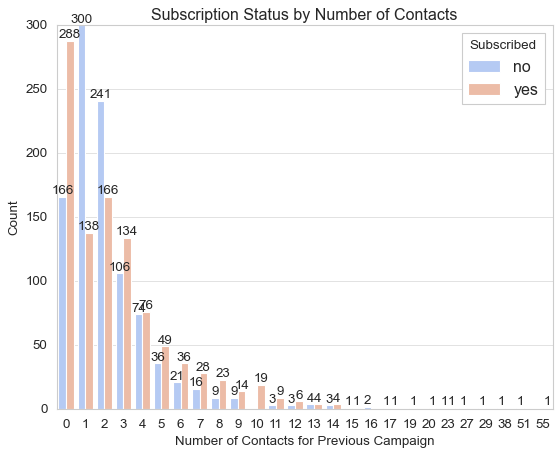

In [37]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_plot, x='previous_campaign_contacts', hue='subscribed', palette="coolwarm")

# Add count labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.xlabel("Number of Contacts for Previous Campaign")
plt.ylabel("Count")
plt.title("Subscription Status by Number of Contacts")
plt.legend(title="Subscribed")
plt.show()

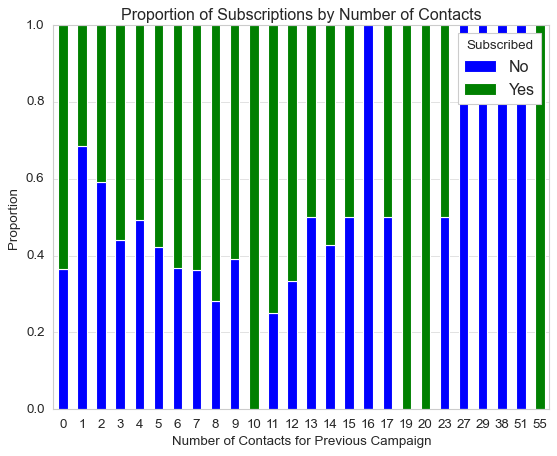

In [38]:
# Compute proportions
outcome_subscribed = df_plot.groupby(['previous_campaign_contacts', 'subscribed']).size().unstack()
outcome_subscribed = outcome_subscribed.div(outcome_subscribed.sum(axis=1), axis=0)

# Plot
outcome_subscribed.plot(kind='bar', stacked=True)

plt.xlabel("Number of Contacts for Previous Campaign")
plt.ylabel("Proportion")
plt.title("Proportion of Subscriptions by Number of Contacts")
plt.legend(title="Subscribed", labels=["No", "Yes"])
plt.xticks(rotation=0)
plt.show()

16. prev_campaign_outcome: outcome of the previous marketing campaign (categorical: "other","failure","success")

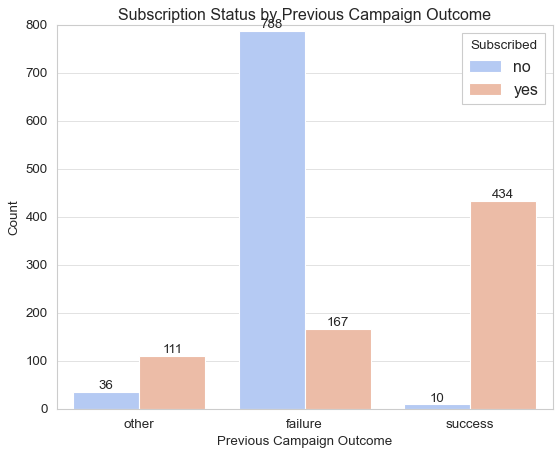

In [39]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_plot, x='prev_campaign_outcome', hue='subscribed', order=["other", "failure", "success"], palette="coolwarm")

# Add count labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.xlabel("Previous Campaign Outcome")
plt.ylabel("Count")
plt.title("Subscription Status by Previous Campaign Outcome")
plt.legend(title="Subscribed")
plt.show()

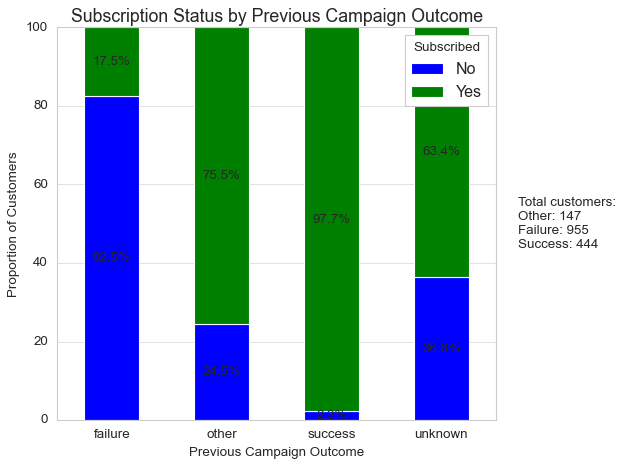

In [40]:
df_plot['prev_campaign_outcome'] = df_plot['prev_campaign_outcome'].fillna('unknown')


# Calculate percentage of subscriptions for each previous campaign outcome
outcome_subscription = (df_plot.groupby('prev_campaign_outcome')['subscribed'].value_counts(normalize=True).unstack())*100

# Create the stacked bar plot
outcome_subscription.plot(kind='bar', stacked=True)

# Customize the plot
plt.title('Subscription Status by Previous Campaign Outcome', fontsize=16)
plt.xlabel('Previous Campaign Outcome', fontsize=12)
plt.ylabel('Proportion of Customers', fontsize=12)
plt.legend(title='Subscribed', labels=['No', 'Yes'])
plt.xticks(rotation=0)

# Add percentage labels on the bars
for c in plt.gca().containers:
	plt.gca().bar_label(c, fmt='%.1f%%', label_type='center')

# Add a text summary
total_counts = df_plot['prev_campaign_outcome'].value_counts()
summary_text = "\n".join([
	f"Total customers:",
	f"Other: {total_counts.get('other', 0)}",
	f"Failure: {total_counts.get('failure', 0)}",
	f"Success: {total_counts.get('success', 0)}"
])
plt.text(1.05, 0.5, summary_text, 
			transform=plt.gca().transAxes, 
			verticalalignment='center',
			bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()

##### _1.3.2 Draw short conclusions from these plots_

Note: Make sure your conclusions are related to the question you have formulated.

From the above plot our data suggests that people over 60 are likely to subscribe.

One person with credit in default is subscribed. Fourteen people are non-subscribers with credit in default.

From the above we can tell that 164 out of 165 over 60's subscribed (only 8.25%). Where below 60's are slight more inclined to not subscribe. It is a small sample of over 60's but still over 99% of them subscribed.

If they have a loan they are more likely to not subscribe.

I think from this plot it can be concluded that January (245 no and 0 yes) and February (404 no and 0 yes) are bad months to try an subscribe a potential client. Where as between June and October (with a combined 631 yes and 3 no).

One person with credit in default is subscribed. Fourteen people are non-subscribers with credit in default.

From the above we can tell that 164 out of 165 over 60's subscribed. Where below 60's are slight more inclined to not subscribe.

It is a small sample of over 60's but still over 99% of them subscribed.

If they have a loan they are more likely to not subscribe.

I think from this plot it can be concluded that January (245 no and 0 yes) and February (404 no and 0 yes) are bad months to try an subscribe a potential client. Where as between June and October (with a combined 631 yes and 3 no).

The mean of average yearly balance for people who subscribed (€1,884.46) is just under double that of people who didn't subscribe (€942.86).

The data suggests that the higher the education level clients are slighly more likely to subscribe, but the number of clients in each education category varies so this may need to be accounted for as well.

Clients who were previously subscribed are more likely to subscribe to current campaign and the opposite can be said for people who didn't previously subscribe.

------

Refined version to go over:

My analysis suggests that age significantly influences subscription likelihood. Over 99% of clients aged 60+ subscribed, while younger clients showed lower subscription rates. Clients with outstanding loans (housing or personal) were less likely to subscribe.

Seasonality matters—January and February saw no subscriptions, while June to October had a high success rate (631 yes, 3 no). Financial stability also plays a role; subscribers had nearly double the average yearly balance (€1,884.46 vs. €942.86).

Education may have a slight impact, with higher levels correlating with more subscriptions, though variations in sample sizes need further analysis. Previous campaign outcomes are strong predictors—clients who subscribed before were more likely to subscribe again, while non-subscribers remained hesitant.

In [41]:
#correlation matrix
sns.heatmap(df_numeric.corr(),annot=True)

<Axes: >

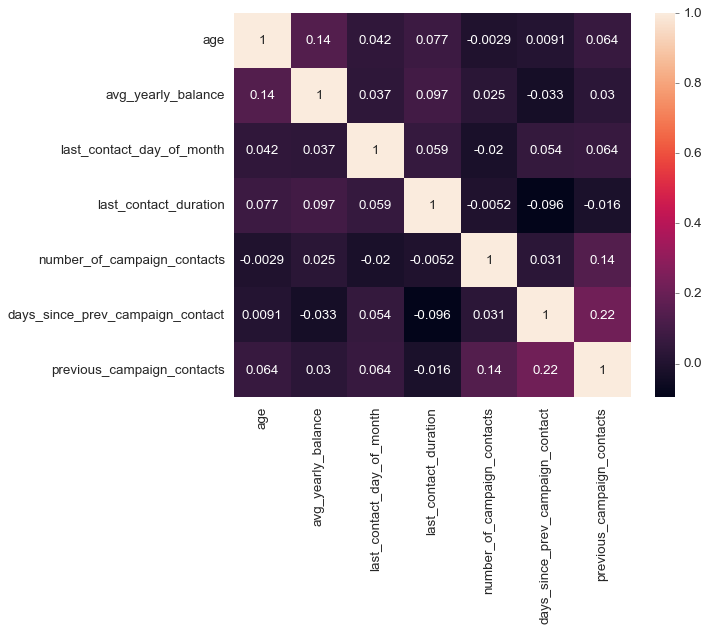

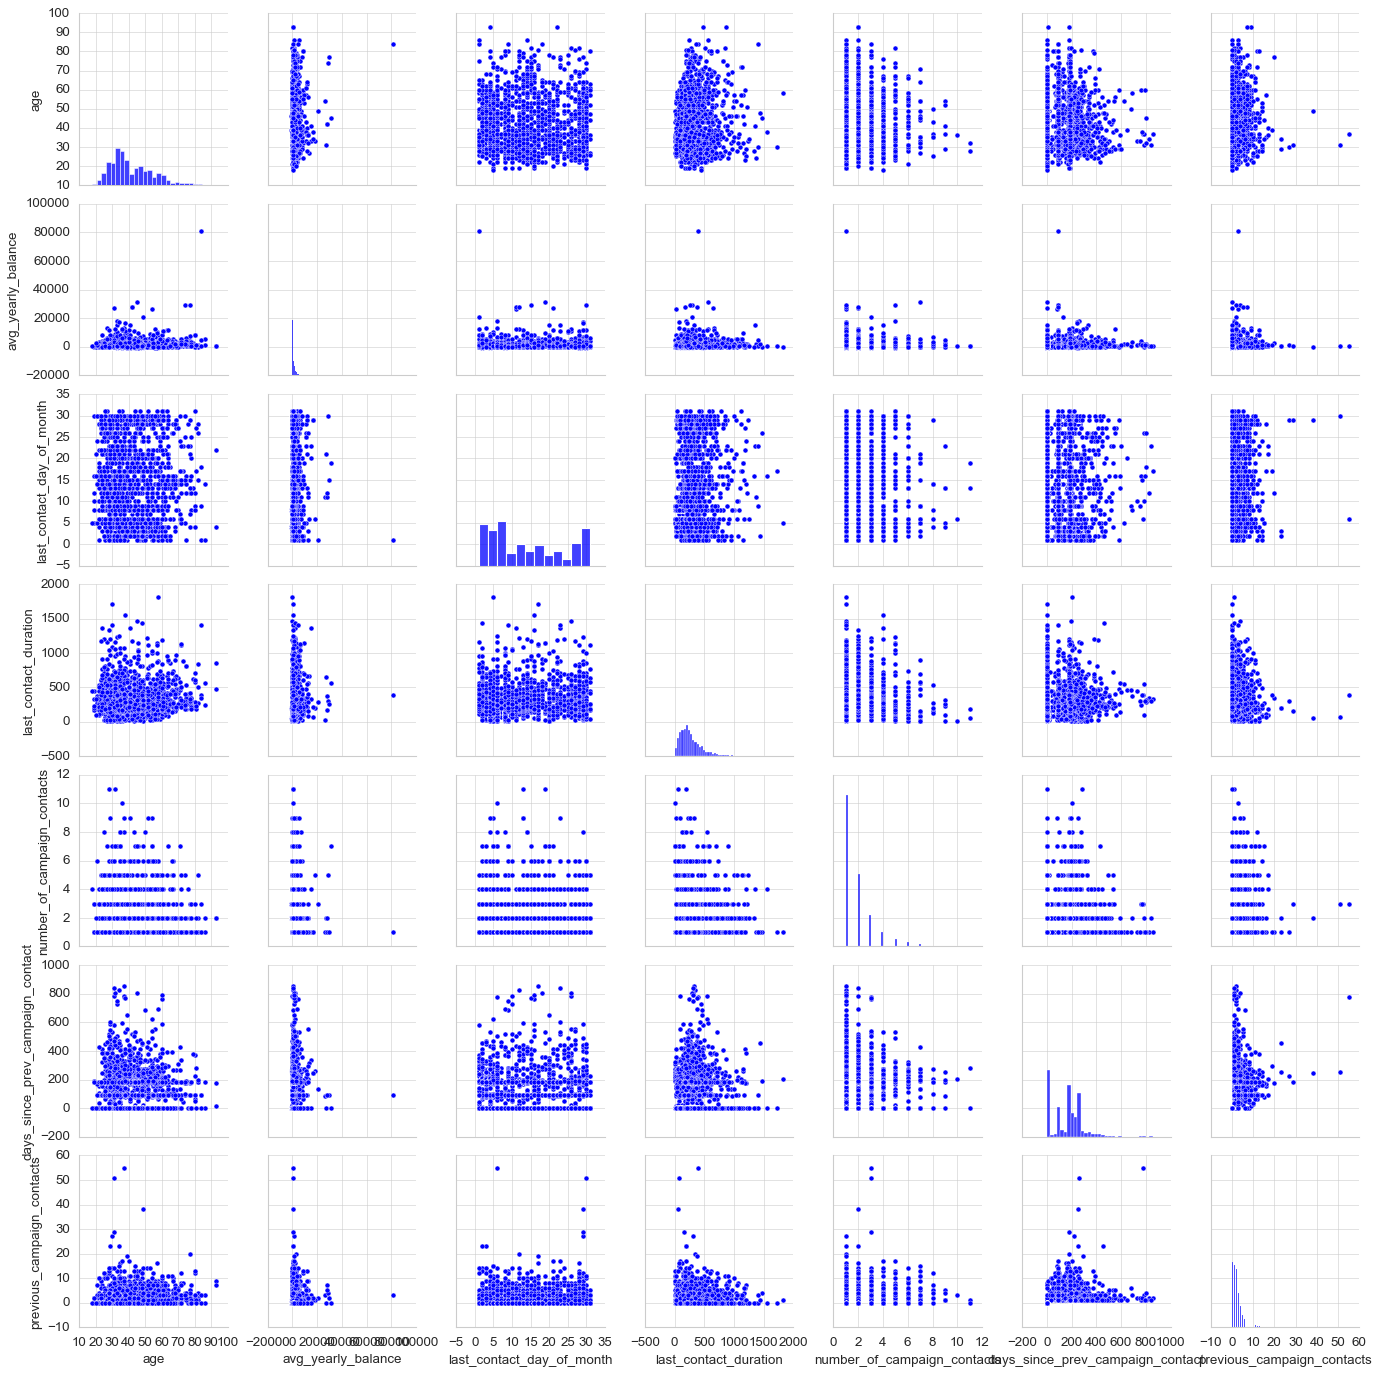

In [42]:
# pair plot
sns.pairplot(data=df_numeric.dropna())
plt.show()

Is it beneifical to combine last contact month and day?

# Task 2: Data Preparation

Ensure that you have:

 - encoded all categorical attributes as numerical,
 - filled in all missing values,
 - applied a scaler to rescale features,
 - treated outliers and skewed attribute distribution appropriately,
 - created at least one new feature from the existing ones.

In [43]:
# data_columns = df.select_dtypes(include=['number']).columns.tolist()

# for i, col in enumerate(data_columns):
# 	data = pd.concat([df[col], df[data_columns[-i]]], axis=1)
# 	data.plot.scatter(x=col, y=data_columns[-i])
# 	plt.show()

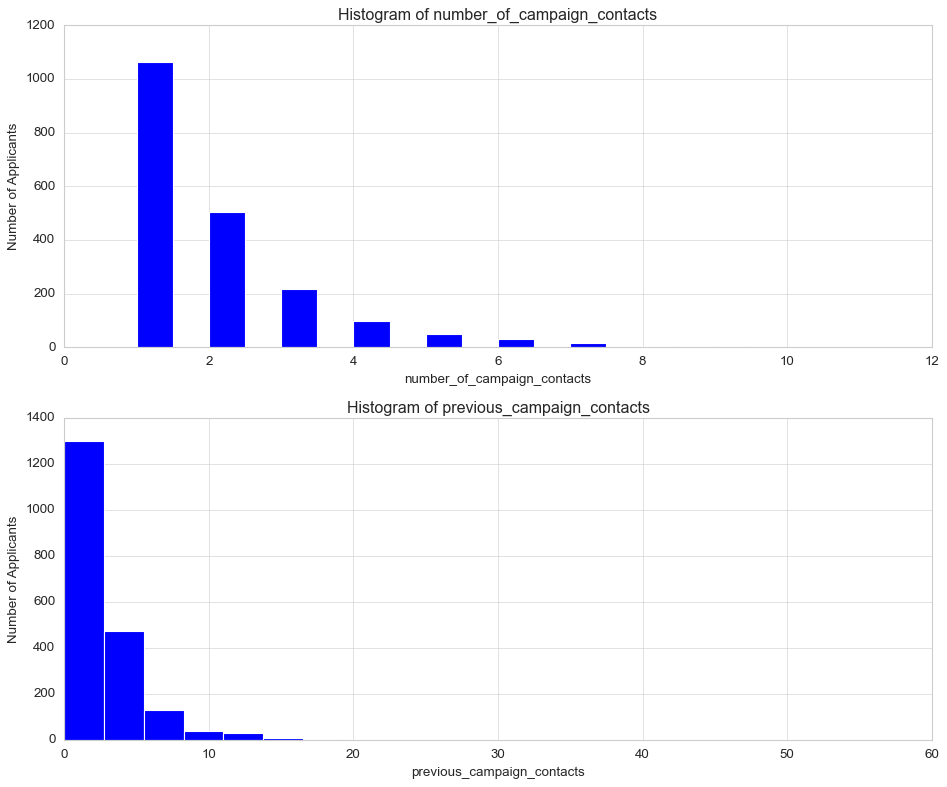

In [44]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10))


# Plot the histogram for 'number_of_campaign_contacts'
axs[0].hist(df['number_of_campaign_contacts'], bins=20)
axs[0].set_title("Histogram of number_of_campaign_contacts")
axs[0].set_xlabel('number_of_campaign_contacts')
axs[0].set_ylabel('Number of Applicants')

# Plot the histogram for 'previous_campaign_contacts'
axs[1].hist(df['previous_campaign_contacts'], bins=20)
axs[1].set_title("Histogram of previous_campaign_contacts")
axs[1].set_xlabel('previous_campaign_contacts')
axs[1].set_ylabel('Number of Applicants')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [45]:
df.select_dtypes(include=['number']).skew()

age                                  0.853921
avg_yearly_balance                  11.461564
last_contact_day_of_month            0.403661
last_contact_duration                2.045787
number_of_campaign_contacts          2.320856
days_since_prev_campaign_contact     0.920006
previous_campaign_contacts           5.461168
dtype: float64

In [46]:
# Use a log transformation to decrease the impact of outliers
df['avg_yearly_balance'] = np.log(df['avg_yearly_balance'] + abs(min(df['avg_yearly_balance'])) + 1)
df['last_contact_duration'] = np.log(df['last_contact_duration'] + abs(min(df['last_contact_duration'])) + 1)
df['number_of_campaign_contacts'] = np.log(df['number_of_campaign_contacts'] + abs(min(df['number_of_campaign_contacts'])) + 1)
df['previous_campaign_contacts'] = np.log(df['previous_campaign_contacts'] + abs(min(df['previous_campaign_contacts'])) + 1)

In [47]:
# Create a mapper
month_map = {
    "jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, 
    "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12
}

# Convert the month names to numeric values
df['last_contact_month_of_year'] = df['last_contact_month_of_year'].map(month_map)

# Calculate the cyclical encoding using sine and cosine transformations
df['month_sin'] = np.sin(2 * np.pi * df['last_contact_month_of_year'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['last_contact_month_of_year'] / 12)


applying the sine and cosine transformations to map each month to two continuous features (month_sin and month_cos). These features will now reflect the cyclical nature of the months, where January and December are close to each other.

In [48]:
# Number of days in a month (assuming a 31-day month for generality)
days_in_month = 31

# Calculate the cyclical encoding using sine and cosine transformations
df['day_sin'] = np.sin(2 * np.pi * df['last_contact_day_of_month'] / days_in_month)
df['day_cos'] = np.cos(2 * np.pi * df['last_contact_day_of_month'] / days_in_month)

Same for days

In [49]:
# Replace NaN values with 'unknown'
df['prev_campaign_outcome'] = df['prev_campaign_outcome'].fillna('unknown')

Then fill in "unknown" for NaN values for `prev_campaign_outcome` because in the description of the data it states:

poutcome: outcome of the previous marketing campaign (categorical: **"unknown"**,"other","failure","success")



In [50]:
df.select_dtypes(include=['number']).skew()

age                                 0.853921
avg_yearly_balance                  0.312404
last_contact_day_of_month           0.403661
last_contact_month_of_year          0.455357
last_contact_duration              -0.412734
number_of_campaign_contacts         1.343090
days_since_prev_campaign_contact    0.920006
previous_campaign_contacts          0.294855
month_sin                          -0.637790
month_cos                           0.069918
day_sin                            -0.362772
day_cos                            -0.449210
dtype: float64

Using log transformation because they are positively skewed and above 1

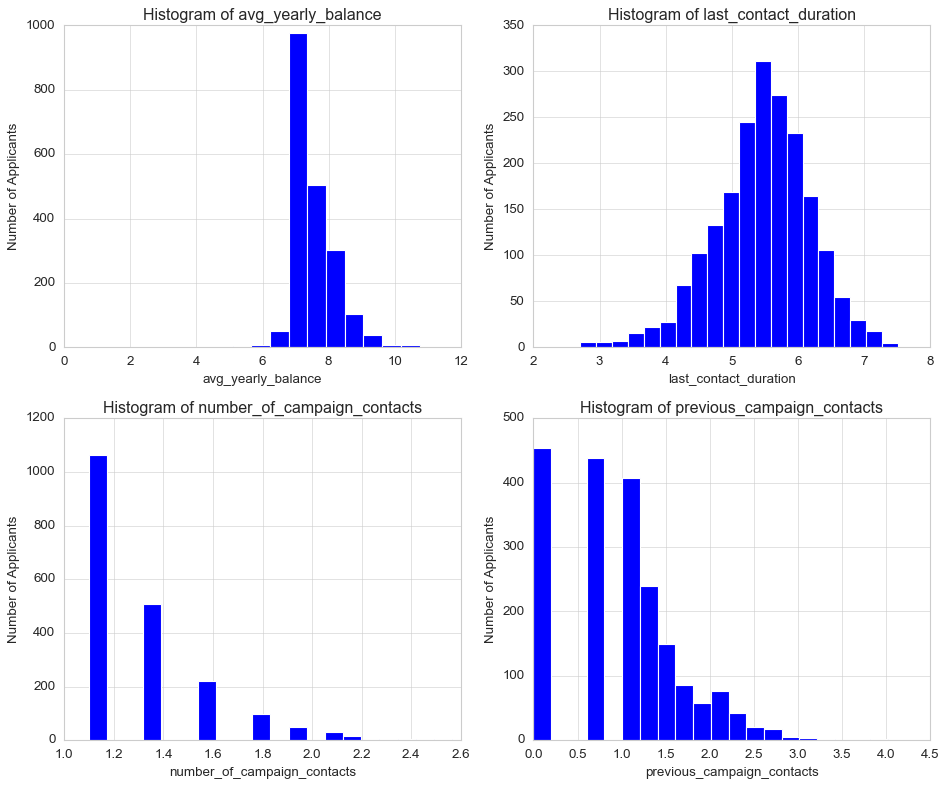

In [51]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot the histogram for 'avg_yearly_balance'
axs[0, 0].hist(df['avg_yearly_balance'], bins=20)
axs[0, 0].set_title("Histogram of avg_yearly_balance")
axs[0, 0].set_xlabel('avg_yearly_balance')
axs[0, 0].set_ylabel('Number of Applicants')

# Plot the histogram for 'last_contact_duration'
axs[0, 1].hist(df['last_contact_duration'], bins=20)
axs[0, 1].set_title("Histogram of last_contact_duration")
axs[0, 1].set_xlabel('last_contact_duration')
axs[0, 1].set_ylabel('Number of Applicants')

# Plot the histogram for 'number_of_campaign_contacts'
axs[1, 0].hist(df['number_of_campaign_contacts'], bins=20)
axs[1, 0].set_title("Histogram of number_of_campaign_contacts")
axs[1, 0].set_xlabel('number_of_campaign_contacts')
axs[1, 0].set_ylabel('Number of Applicants')

# Plot the histogram for 'previous_campaign_contacts'
axs[1, 1].hist(df['previous_campaign_contacts'], bins=20)
axs[1, 1].set_title("Histogram of previous_campaign_contacts")
axs[1, 1].set_xlabel('previous_campaign_contacts')
axs[1, 1].set_ylabel('Number of Applicants')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Create a new feature

In [52]:
# Days in each month for a non-leap year
days_in_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

# Calculate the day of the year
df['day_of_year'] = df['last_contact_month_of_year'].apply(lambda x: sum(days_in_month[:x-1])) + df['last_contact_day_of_month']

# Normalize day_of_year to 0-2*pi
df['day_of_year_sin'] = np.sin(2 * np.pi * (df['day_of_year'] - 1) / 365)
df['day_of_year_cos'] = np.cos(2 * np.pi * (df['day_of_year'] - 1) / 365)

The skew for age is greater than 0.8 so I decided to use the median age instead of the mean as it's often a better option since it is more robust to extreme values.

In [53]:
median_age = df['age'].median()
df['age'] = df['age'].fillna(median_age)

In [54]:
df.isna().sum()

age                                   0
job                                  10
marital                               0
education                           104
credit_in_default                     0
avg_yearly_balance                    0
housing_loan                          0
personal_loan                         0
contact_type                        191
last_contact_day_of_month             0
last_contact_month_of_year            0
last_contact_duration                 0
number_of_campaign_contacts           0
days_since_prev_campaign_contact      0
previous_campaign_contacts            0
prev_campaign_outcome                 0
subscribed                            0
month_sin                             0
month_cos                             0
day_sin                               0
day_cos                               0
day_of_year                           0
day_of_year_sin                       0
day_of_year_cos                       0
dtype: int64

In [55]:

df.tail()

,age,job,marital,education,credit_in_default,avg_yearly_balance,housing_loan,personal_loan,contact_type,last_contact_day_of_month,...,previous_campaign_contacts,prev_campaign_outcome,subscribed,month_sin,month_cos,day_sin,day_cos,day_of_year,day_of_year_sin,day_of_year_cos
1995,20.0,student,single,NaN,no,8.233769,no,no,cellular,16,...,0.0,unknown,yes,-1.0,-1.836970e-16,-0.101168,-0.994869,259,-0.963471,-0.267814
1996,28.0,admin.,single,secondary,no,7.010312,no,no,cellular,16,...,0.0,unknown,yes,-1.0,-1.836970e-16,-0.101168,-0.994869,259,-0.963471,-0.267814
1997,81.0,retired,married,primary,no,7.666222,no,no,telephone,17,...,0.0,unknown,yes,-1.0,-1.836970e-16,-0.299363,-0.954139,260,-0.967938,-0.251190
1998,46.0,services,married,primary,no,8.579980,yes,no,NaN,20,...,0.0,unknown,yes,-1.0,-1.836970e-16,-0.790776,-0.612106,263,-0.979614,-0.200891
1999,40.0,entrepreneur,married,secondary,no,8.907071,no,no,cellular,22,...,0.0,unknown,yes,-1.0,-1.836970e-16,-0.968077,-0.250653,265,-0.985948,-0.167052


In [56]:
df_categorical.columns

Index(['job', 'marital', 'education', 'credit_in_default', 'housing_loan',
       'personal_loan', 'contact_type', 'last_contact_month_of_year',
       'prev_campaign_outcome', 'subscribed'],
      dtype='object')

In [57]:
df['contact_type'].value_counts(dropna=False)

contact_type
cellular     1663
NaN           191
telephone     146
Name: count, dtype: int64

In [58]:
df['contact_type'] = df['contact_type'].fillna("unknown")

In [59]:
df.isna().sum()

age                                   0
job                                  10
marital                               0
education                           104
credit_in_default                     0
avg_yearly_balance                    0
housing_loan                          0
personal_loan                         0
contact_type                          0
last_contact_day_of_month             0
last_contact_month_of_year            0
last_contact_duration                 0
number_of_campaign_contacts           0
days_since_prev_campaign_contact      0
previous_campaign_contacts            0
prev_campaign_outcome                 0
subscribed                            0
month_sin                             0
month_cos                             0
day_sin                               0
day_cos                               0
day_of_year                           0
day_of_year_sin                       0
day_of_year_cos                       0
dtype: int64

In [60]:
# first one-hot encode the categorical columns with NaNs

df = pd.get_dummies(df, columns=['contact_type', 'education', 'job'], 
                        dummy_na=True, 
                        drop_first=True)
df.tail()

,age,marital,credit_in_default,avg_yearly_balance,housing_loan,personal_loan,last_contact_day_of_month,last_contact_month_of_year,last_contact_duration,number_of_campaign_contacts,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_nan
1995,20.0,single,no,8.233769,no,no,16,9,5.814131,1.386294,...,False,False,False,False,False,False,True,False,False,False
1996,28.0,single,no,7.010312,no,no,16,9,7.201916,1.386294,...,False,False,False,False,False,False,False,False,False,False
1997,81.0,married,no,7.666222,no,no,17,9,5.476464,1.098612,...,False,False,False,True,False,False,False,False,False,False
1998,46.0,married,no,8.579980,yes,no,20,9,5.262690,1.098612,...,False,False,False,False,False,True,False,False,False,False
1999,40.0,married,no,8.907071,no,no,22,9,5.375278,1.386294,...,True,False,False,False,False,False,False,False,False,False


In [61]:
# now one-hot encode all other categorical columns

df = pd.get_dummies(df, drop_first=True)
df.head()

,age,avg_yearly_balance,last_contact_day_of_month,last_contact_month_of_year,last_contact_duration,number_of_campaign_contacts,days_since_prev_campaign_contact,previous_campaign_contacts,month_sin,month_cos,...,job_nan,marital_married,marital_single,credit_in_default_yes,housing_loan_yes,personal_loan_yes,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown,subscribed_yes
0,32.0,7.224753,1,4,6.872128,1.386294,131,1.098612,0.866025,-0.5,...,False,False,True,False,True,False,False,False,False,False
1,39.0,7.419980,1,4,5.484797,1.386294,133,0.693147,0.866025,-0.5,...,False,False,False,False,True,True,False,False,False,False
2,59.0,7.608871,1,4,4.897840,1.386294,239,0.693147,0.866025,-0.5,...,False,True,False,False,True,True,False,False,False,False
3,47.0,7.229114,1,4,5.641907,1.098612,238,1.098612,0.866025,-0.5,...,False,True,False,False,True,True,False,False,False,False
4,54.0,7.593374,1,4,6.188264,1.098612,307,0.693147,0.866025,-0.5,...,False,True,False,False,True,False,False,False,False,False


In [62]:
df_numeric.head()

,age,avg_yearly_balance,last_contact_day_of_month,last_contact_duration,number_of_campaign_contacts,days_since_prev_campaign_contact,previous_campaign_contacts
0,32.0,392,1,957,2,131,2
1,39.0,688,1,233,2,133,1
2,59.0,1035,1,126,2,239,1
3,47.0,398,1,274,1,238,2
4,54.0,1004,1,479,1,307,1


In [63]:
df_numeric.isna().sum()

age                                 12
avg_yearly_balance                   0
last_contact_day_of_month            0
last_contact_duration                0
number_of_campaign_contacts          0
days_since_prev_campaign_contact     0
previous_campaign_contacts           0
dtype: int64

In [64]:
# Check there are no negative values
all_non_negative = (df[['last_contact_day_of_month', 'last_contact_duration', 'number_of_campaign_contacts', 'previous_campaign_contacts']] >= 0).all().all()
all_non_negative

np.True_

In [65]:
has_zero_values = (df[['days_since_prev_campaign_contact']] == 0).all().all()
has_zero_values

np.False_

In [66]:
has_zero_values = (df[['days_since_prev_campaign_contact']] < -1).all().all()
has_zero_values

np.False_

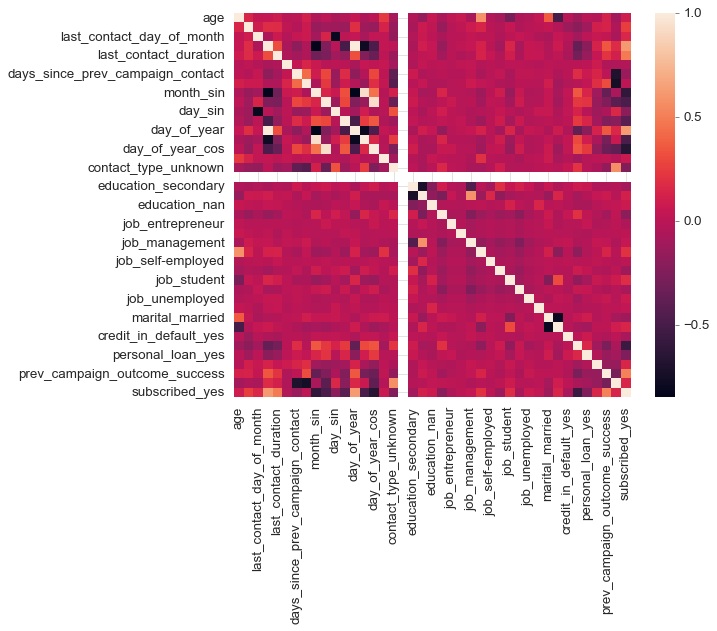

In [67]:
#correlation matrix
sns.heatmap(df.corr(numeric_only=True))
plt.show()

From reviewing Gerard McCabe' notebook I use annot=True for the corelation plot to add values.

From reviewing Cian Moore notebook I use plt.style.use('ggplot') to standardise plot styles, df.info() for counts of NaN values, and table=True for figures for a plot.

From reviewing Cathal O'Domhnaills notebook I combined more values into the describe table instead of printing them seperatly.

# Appendix

#### Bank Client Data Description from [archive.ics.uci.edu](https://archive.ics.uci.edu/dataset/222/bank+marketing):

Slightly audited description of the dataset from archive.ics.uci.edu including the name changes above:

1. **age**: Age of client (numeric)
2. **job**: Type of job (categorical: "admin.", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services")
3. **marital**: Marital status (categorical: "married", "divorced", "single"; note: "divorced" means divorced or widowed)
4. **education**: Level of education (categorical: "secondary", "primary", "tertiary")
5. **credit_in_default**: Has credit in default (the borrower has failed to meet the agreed-upon repayment terms of a loan or credit agreement)? (binary: "yes", "no")
6. **avg_yearly_balance**: Average yearly balance, in euros (numeric - can be negative)
7. **housing_loan**: Has housing loan? (binary: "yes", "no")
8. **personal_loan**: Has personal loan? (binary: "yes", "no")

#### Related with the last contact of the current campaign:

9. **contact_type**: Contact communication type (categorical: "telephone", "cellular")
10. **last_contact_day_of_month**: Last contact day of the month (numeric)
11. **last_contact_month_of_year**: Last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12. **last_contact_duration**: Last contact duration, in seconds (numeric)

#### Other attributes:

13. **number_of_campaign_contacts**: Number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. **days_since_prev_campaign_contact**: Number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. **previous_campaign_contacts**: Number of contacts performed before this campaign and for this client (numeric)
16. **prev_campaign_outcome**: Outcome of the previous marketing campaign (categorical: "other", "failure", "success")

#### Output variable (desired target):

17. **subscribed**: Has the client subscribed a term deposit? (binary: "yes", "no")


In [68]:
for col in df_categorical.columns:
    print(f"Column: {col}")
    display(df_categorical[col].value_counts(dropna=False))

Column: job


job
management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
NaN               10
Name: count, dtype: int64

Column: marital


marital
married     1111
single       674
divorced     215
Name: count, dtype: int64

Column: education


education
secondary    995
tertiary     684
primary      217
NaN          104
Name: count, dtype: int64

Column: credit_in_default


credit_in_default
no     1985
yes      15
Name: count, dtype: int64

Column: housing_loan


housing_loan
no     1037
yes     963
Name: count, dtype: int64

Column: personal_loan


personal_loan
no     1750
yes     250
Name: count, dtype: int64

Column: contact_type


contact_type
cellular     1663
NaN           191
telephone     146
Name: count, dtype: int64

Column: last_contact_month_of_year


last_contact_month_of_year
feb    404
may    333
jan    245
apr    205
jul    167
aug    136
sep    134
jun    104
oct     93
mar     70
nov     68
dec     41
Name: count, dtype: int64

Column: prev_campaign_outcome


prev_campaign_outcome
failure    955
NaN        454
success    444
other      147
Name: count, dtype: int64

Column: subscribed


subscribed
no     1000
yes    1000
Name: count, dtype: int64

norm: p-value = 1.253740009237451e-25
expon: p-value = 2.7952358377770645e-117
gamma: p-value = 7.220271311108981e-07
lognorm: p-value = 1.4273524701806721e-05


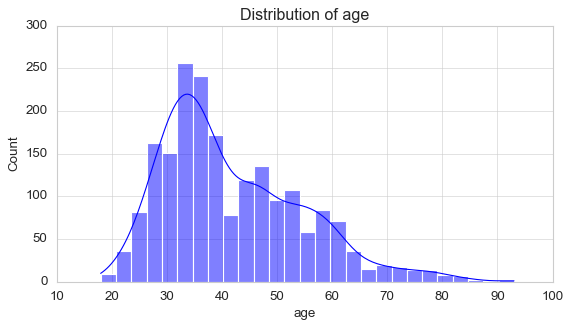

Best-fitting distribution: lognorm (p-value = 1.4273524701806721e-05)
norm: p-value = 3.8103893020982405e-145
expon: p-value = 1.381300257942762e-149
gamma: p-value = 0.0
lognorm: p-value = 0.0


c:\Users\seanp\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6902: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


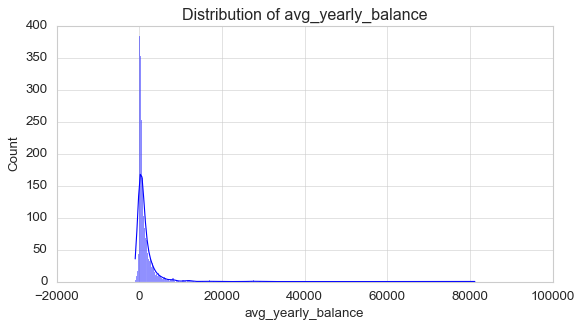

Best-fitting distribution: lognorm (p-value = 1.4273524701806721e-05)
norm: p-value = 3.7924701605757564e-44
expon: p-value = 2.043633626313604e-17
gamma: p-value = 4.4951919290651025e-14
lognorm: p-value = 1.0929067672323048e-16


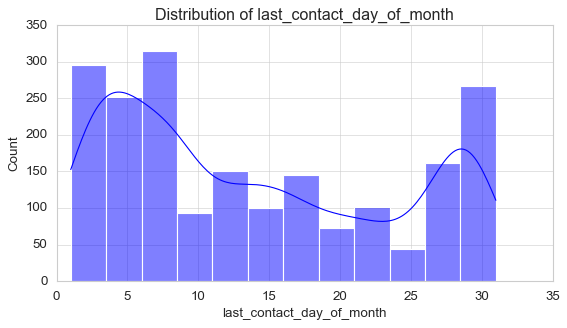

Best-fitting distribution: lognorm (p-value = 1.4273524701806721e-05)
norm: p-value = 5.276542791149556e-31
expon: p-value = 4.342791478653933e-36
gamma: p-value = 0.0
lognorm: p-value = 0.24544160030243412


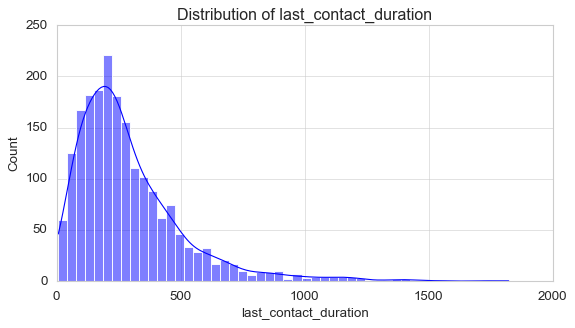

Best-fitting distribution: lognorm (p-value = 0.24544160030243412)
norm: p-value = 5.922925596133476e-136
expon: p-value = 0.0
gamma: p-value = 0.0
lognorm: p-value = 2.302291196481566e-229


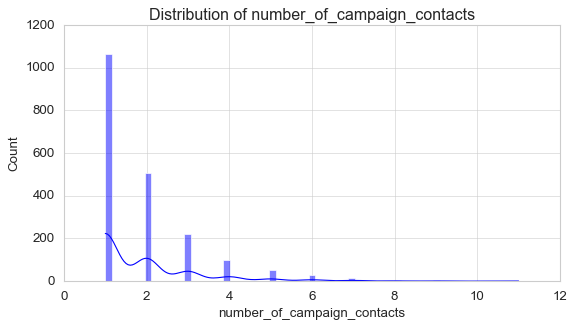

Best-fitting distribution: lognorm (p-value = 0.24544160030243412)
norm: p-value = 5.396357930381498e-29
expon: p-value = 1.038694367005373e-94
gamma: p-value = 0.0
lognorm: p-value = 0.0


c:\Users\seanp\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6902: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


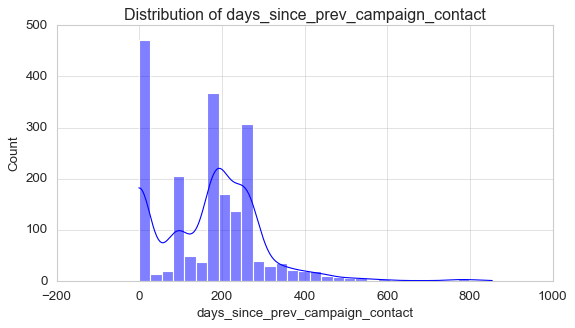

Best-fitting distribution: lognorm (p-value = 0.24544160030243412)
norm: p-value = 6.315560159072325e-90
expon: p-value = 4.7336197292753065e-91
gamma: p-value = 0.0
lognorm: p-value = 0.0


c:\Users\seanp\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6911: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
c:\Users\seanp\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


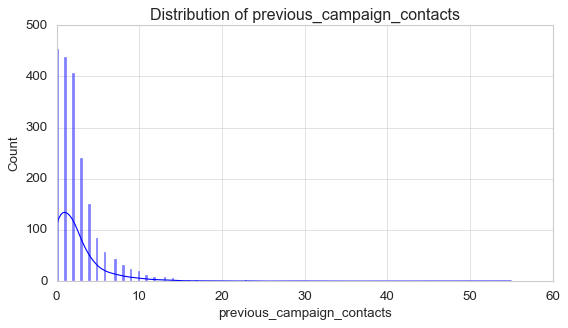

Best-fitting distribution: lognorm (p-value = 0.24544160030243412)


In [69]:
# Fit distributions
dist_names = ['norm', 'expon', 'gamma', 'lognorm']
best_fit = None
best_p = 0

for col in df_numeric.columns:

	data = df_numeric[col].dropna()

	for dist_name in dist_names:
		dist = getattr(stats, dist_name)
		params = dist.fit(data)
		ks_stat, p_value = stats.kstest(data, dist_name, args=params)
		
		print(f"{dist_name}: p-value = {p_value}")
		
		if p_value > best_p:  # Choose best fit
			best_fit = dist_name
			best_p = p_value
	plt.figure(figsize=(8, 4))
	sns.histplot(data, kde=True)
	plt.title(f'Distribution of {col}')
	plt.show()

	print(f"Best-fitting distribution: {best_fit} (p-value = {best_p})")
